<a href="https://colab.research.google.com/github/NarayaniSuresh/PRODIGY_ML_03/blob/main/Task_2_Prodigy_Infotech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                     
0         23.090909 -0.974396           -1.329545                1.132178   
1         71.051724  1.198627           -0.460981               -0.327038   
2        164.529412  0.173295            1.066454               -1.298010   
3         75.723404 -0.781722           -0.403069               -0.215914   
4        162.000000 -0.441917            0.991583                1.239503   

         Gender_Male  
Cluster               
0           0.409091  
1           0.431034  
2           0.588235  
3           0.340426  
4           0.461538  


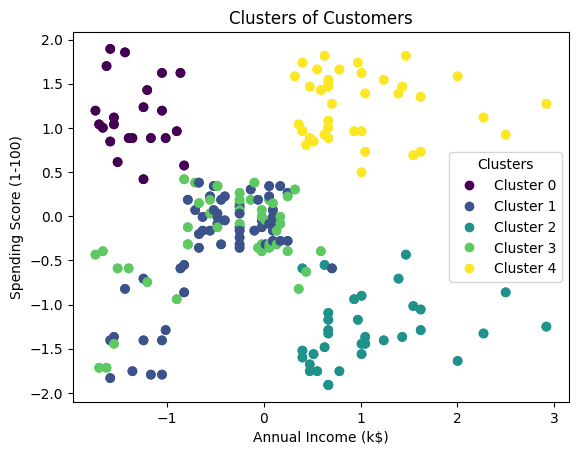

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv("Mall_Customers.csv")

# Data Preprocessing
# Encode Gender column using one-hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
gender_encoded = encoder.fit_transform(data[['Gender']])
gender_df = pd.DataFrame(gender_encoded, columns=['Gender_Male'])
data = pd.concat([data, gender_df], axis=1)
data.drop(columns=['Gender'], inplace=True)

# Standardize numerical columns
scaler = StandardScaler()
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Feature Selection
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]

# Model Building
# Assume we want to form 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Model Training
kmeans.fit(X)

# Cluster Analysis
# Analyze the clusters formed and interpret the results
data['Cluster'] = kmeans.labels_

# Display the average values of each cluster
print(data.groupby('Cluster').mean())

# Visualization
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')

# Add legend
plt.legend(handles=plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=kmeans.labels_, cmap='viridis').legend_elements()[0],
           labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
           title='Clusters')

plt.show()
